In [9]:
import pytz
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.max_rows", 5000)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
games = pd.read_csv("games.csv")

tzmap = {
    'ana': "America/Los_Angeles", # angels
    'ari': "US/Arizona",
    'atl': "US/Eastern",
    'bal': "US/Eastern",
    'bos': "US/Eastern",
    'cha': "US/Central",  # white sox
    'chn': "US/Central",  # cubs
    'cin': "US/Eastern",
    'cle': "US/Eastern",
    'col': "US/Mountain",
    'det': "US/Eastern",
    'hou': "US/Central",
    'kca': "US/Central",
    'lan': "America/Los_Angeles",  # dodgers
    'mia': "US/Eastern",
    'mil': "US/Central",
    'min': "US/Central",
    'nya': "US/Eastern",
    'nyn': "US/Eastern",
    'oak': "US/Pacific",
    'phi': "US/Eastern",
    'pit': "US/Eastern",
    'sdn': "US/Pacific",
    'sea': "US/Pacific",
    'sfn': "US/Pacific",  # giants
    'sln': "US/Central",  # cards
    'tba': "US/Eastern",  # rays
    'tex': "US/Central",
    'tor': "America/Toronto",
    'was': "US/Eastern",
}

games["dtdate"] = pd.to_datetime(games["date"])
games["day_of_week"] = games["dtdate"].dt.weekday
games["weekend"] = games["day_of_week"] > 5
games["start_datetime"] = games.apply(lambda d: pd.to_datetime("{} {}".format(d["date"], d["start_time"])).tz_localize(tzmap.get(d["home_team"], None)), axis=1)
games["start_datetime"].apply(lambda o: type(o)).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [11]:
games["localized_hour"] = games["start_datetime"].apply(lambda d: d.tz_convert("US/Eastern").hour)
games[["home_team", "start_datetime", "localized_hour"]]

,home_team,start_datetime,localized_hour
0,chn,2015-04-05 19:17:00-05:00,20
1,sea,2015-04-06 13:12:00-07:00,16
2,mia,2015-04-06 16:22:00-04:00,16
3,tba,2015-04-06 15:12:00-04:00,15
4,phi,2015-04-06 15:08:00-04:00,15
...,...,...,...
9713,sea,2018-09-30 12:10:00-07:00,15
9714,tba,2018-09-30 15:09:00-04:00,15
9715,col,2018-09-30 13:12:00-06:00,15
9716,lan,2018-10-01 13:09:00-07:00,16


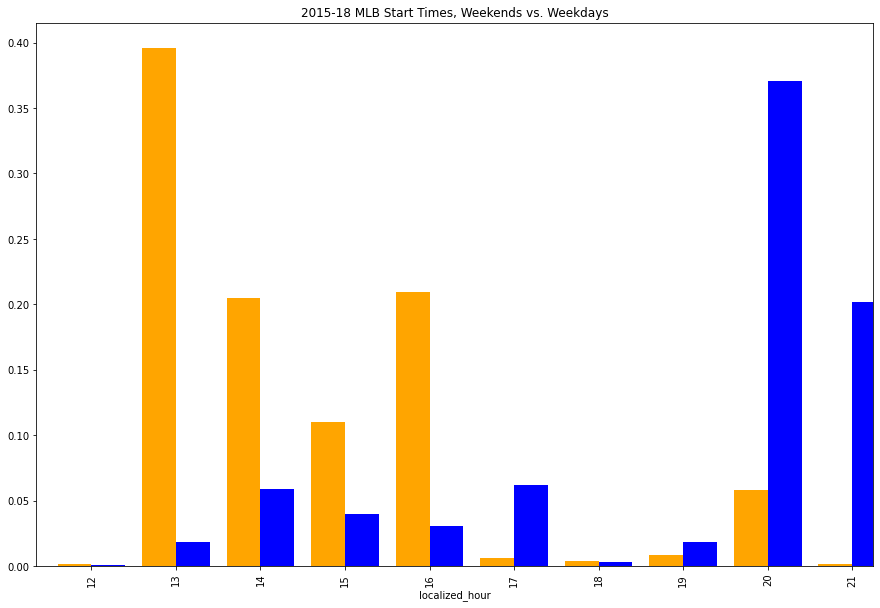

In [28]:
gdf = games[~games["weekend"]].groupby("localized_hour")
ax = (gdf.count() / gdf.count().sum()).sort_index()["attendance"].plot(kind="bar", figsize=(15, 10), title="All 2015-18 MLB Start Times in EST, Weekends vs. Weekdays", color="blue", position=0, width=0.4)
gdf = games[games["weekend"]].groupby("localized_hour")
(gdf.count() / gdf.count().sum()).sort_index()["attendance"].plot(kind="bar", figsize=(15, 10), ax=ax, color="orange", position=1, width=0.4)
plt.show()